<a href="https://colab.research.google.com/github/vivekswamy021/image_classification_model/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Classification Model by using MobileNet V2 from TensorFlow Hub**

#**Downloading mobilenet_v2 classifier**

In [6]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

#**Assigning of MobileNetV2 model to classifier model**

In [7]:
classifier_model = mobilenet_v2

#**Import Libraries**

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import numpy as np
import matplotlib.pylab as plt


##**Wrap classifier model as Keras layer with hub.KerasLayer**

In [9]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x : hub.KerasLayer(classifier_model)(x), input_shape=IMAGE_SHAPE + (3,),trainable=False)
])


In [10]:
import tensorflow as tf
print(tf.__version__)


2.18.0


#**Load or Open image**

In [14]:
from google.colab import files
uploaded = files.upload()

Saving images.jpg to images (1).jpg


In [26]:
pic = 'images.jpg'
pic = Image.open(pic).resize(IMAGE_SHAPE)


#**Rescale image**

In [17]:
pic = np.array(pic)/255.0           ## Converting the PIL Image to a NumPy array and divide it by 255.0 for scaling
pic.shape                                           # access the shape


(224, 224, 3)

In [18]:
pic

array([[[0.62745098, 0.71764706, 0.75294118],
        [0.60784314, 0.69411765, 0.76470588],
        [0.65882353, 0.74117647, 0.81568627],
        ...,
        [0.19215686, 0.28627451, 0.16470588],
        [0.15294118, 0.25490196, 0.09019608],
        [0.29019608, 0.40392157, 0.15686275]],

       [[0.63529412, 0.72941176, 0.76078431],
        [0.61568627, 0.70196078, 0.77254902],
        [0.65882353, 0.74509804, 0.82352941],
        ...,
        [0.22745098, 0.32156863, 0.20392157],
        [0.27058824, 0.36862745, 0.20392157],
        [0.2745098 , 0.38431373, 0.14117647]],

       [[0.65490196, 0.74117647, 0.78039216],
        [0.63529412, 0.71372549, 0.78823529],
        [0.66666667, 0.74509804, 0.82745098],
        ...,
        [0.27843137, 0.36862745, 0.25882353],
        [0.43529412, 0.52941176, 0.37647059],
        [0.28627451, 0.39607843, 0.16078431]],

       ...,

       [[0.41176471, 0.55686275, 0.02745098],
        [0.52156863, 0.6745098 , 0.0627451 ],
        [0.55686275, 0

#**Add a batch dimension with np.newaxis**

In [19]:
pic_expended_dim = pic[np.newaxis, ...]
pic_expended_dim.shape

(1, 224, 224, 3)

#**Predict**

In [20]:
result = classifier.predict(pic_expended_dim)
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


(1, 1001)

- The result is a 1001-element vector of logits, rating the probability of each class for the image.

#**top class ID**

This ID is often used to retrieve the corresponding human-readable label from a class index file, like the ImageNetLabels.tx

In [21]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=389>

In [22]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
labels_path

10484/10484 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'/root/.keras/datasets/ImageNetLabels.txt'

In [23]:
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

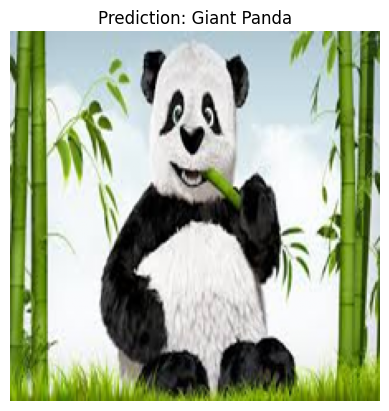

In [25]:
plt.imshow(pic)
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name.title())
plt.axis("off")
plt.show()